# Diabetes Project — Phase 2

**Notebook:** Train Logistic Regression, measure training time, apply Random Projection, compare results.

**Instructions:** Put your CSV dataset file named `your_dataset.csv` in the same folder as this notebook before running the cells. If your target column has a different name, update the `TARGET_COLUMN` variable in the preprocessing cell.

Checking file exists: E:\DSc_project\diabetes_012_health_indicators_BRFSS2015.csv
Dataset loaded. Shape: (253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0



Columns: ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Original unique target values: [np.float64(0.0), np.float64(1.0), np.float64(2.0)]
After conversion, unique target values (should be [0,1]): [np.int64(0), np.int64(1)]

Class distribution (counts):
Diabetes_012
0    213703
1     39977
Name: count, dtype: int64

Class distribution (percentage):
Diabetes_012
0    84.24
1    15.76
Name: count, dtype: float64

Numeric columns (count=21): ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Categorical columns (count=0): []

Processed feature matrix shap

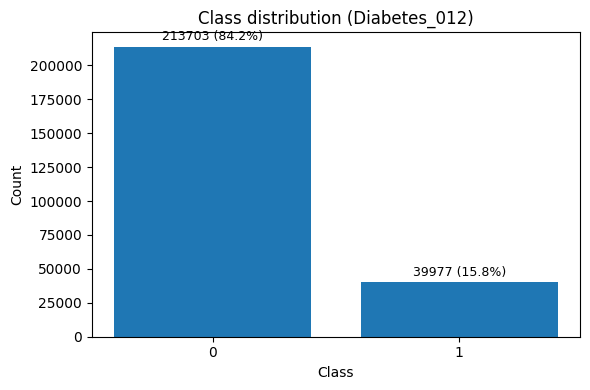

No missing values detected (after initial drop-of-heavy-missing columns).


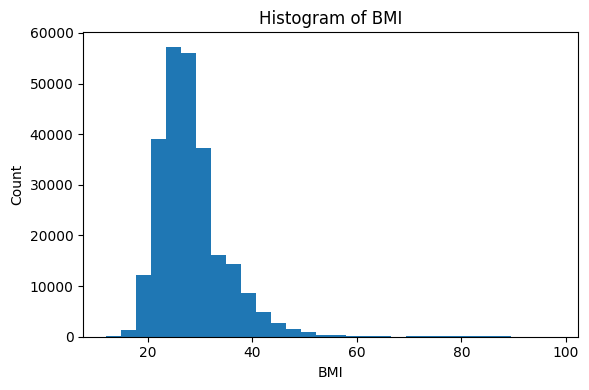

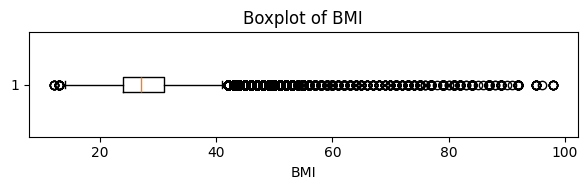

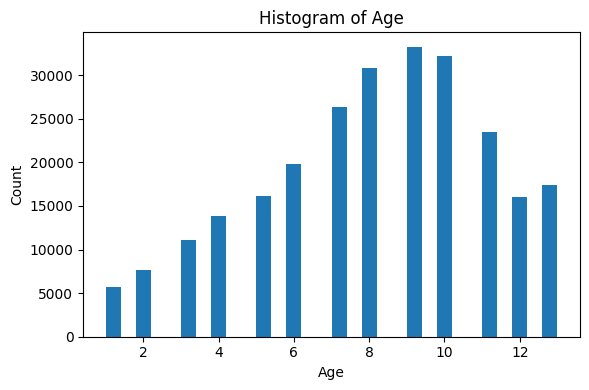

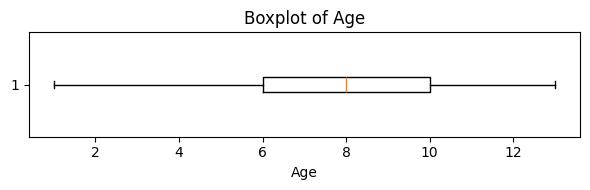

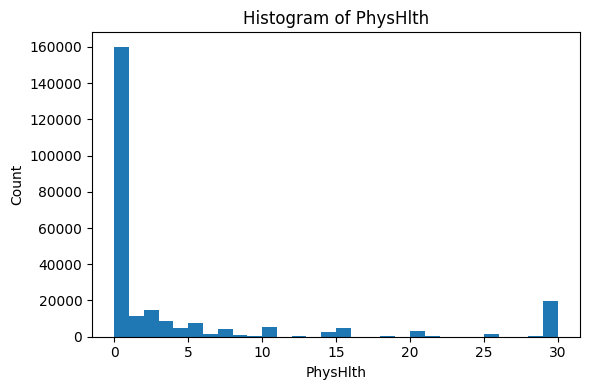

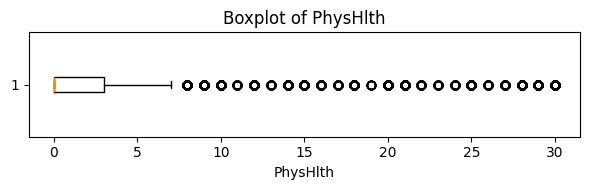

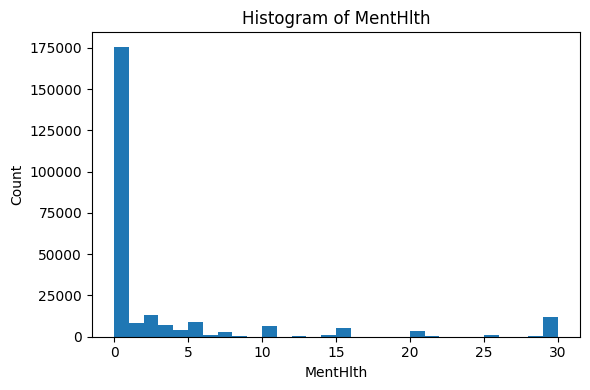

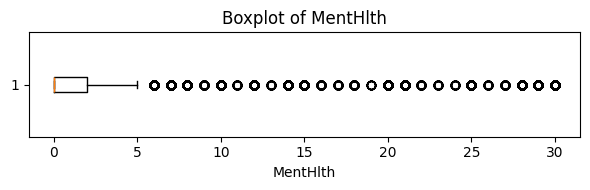

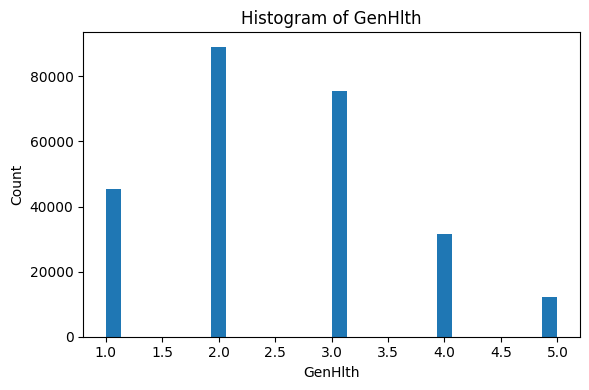

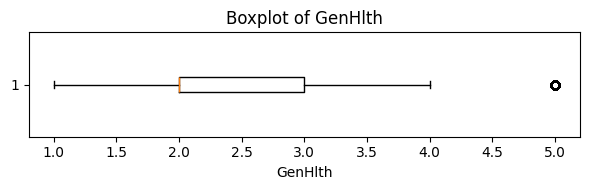

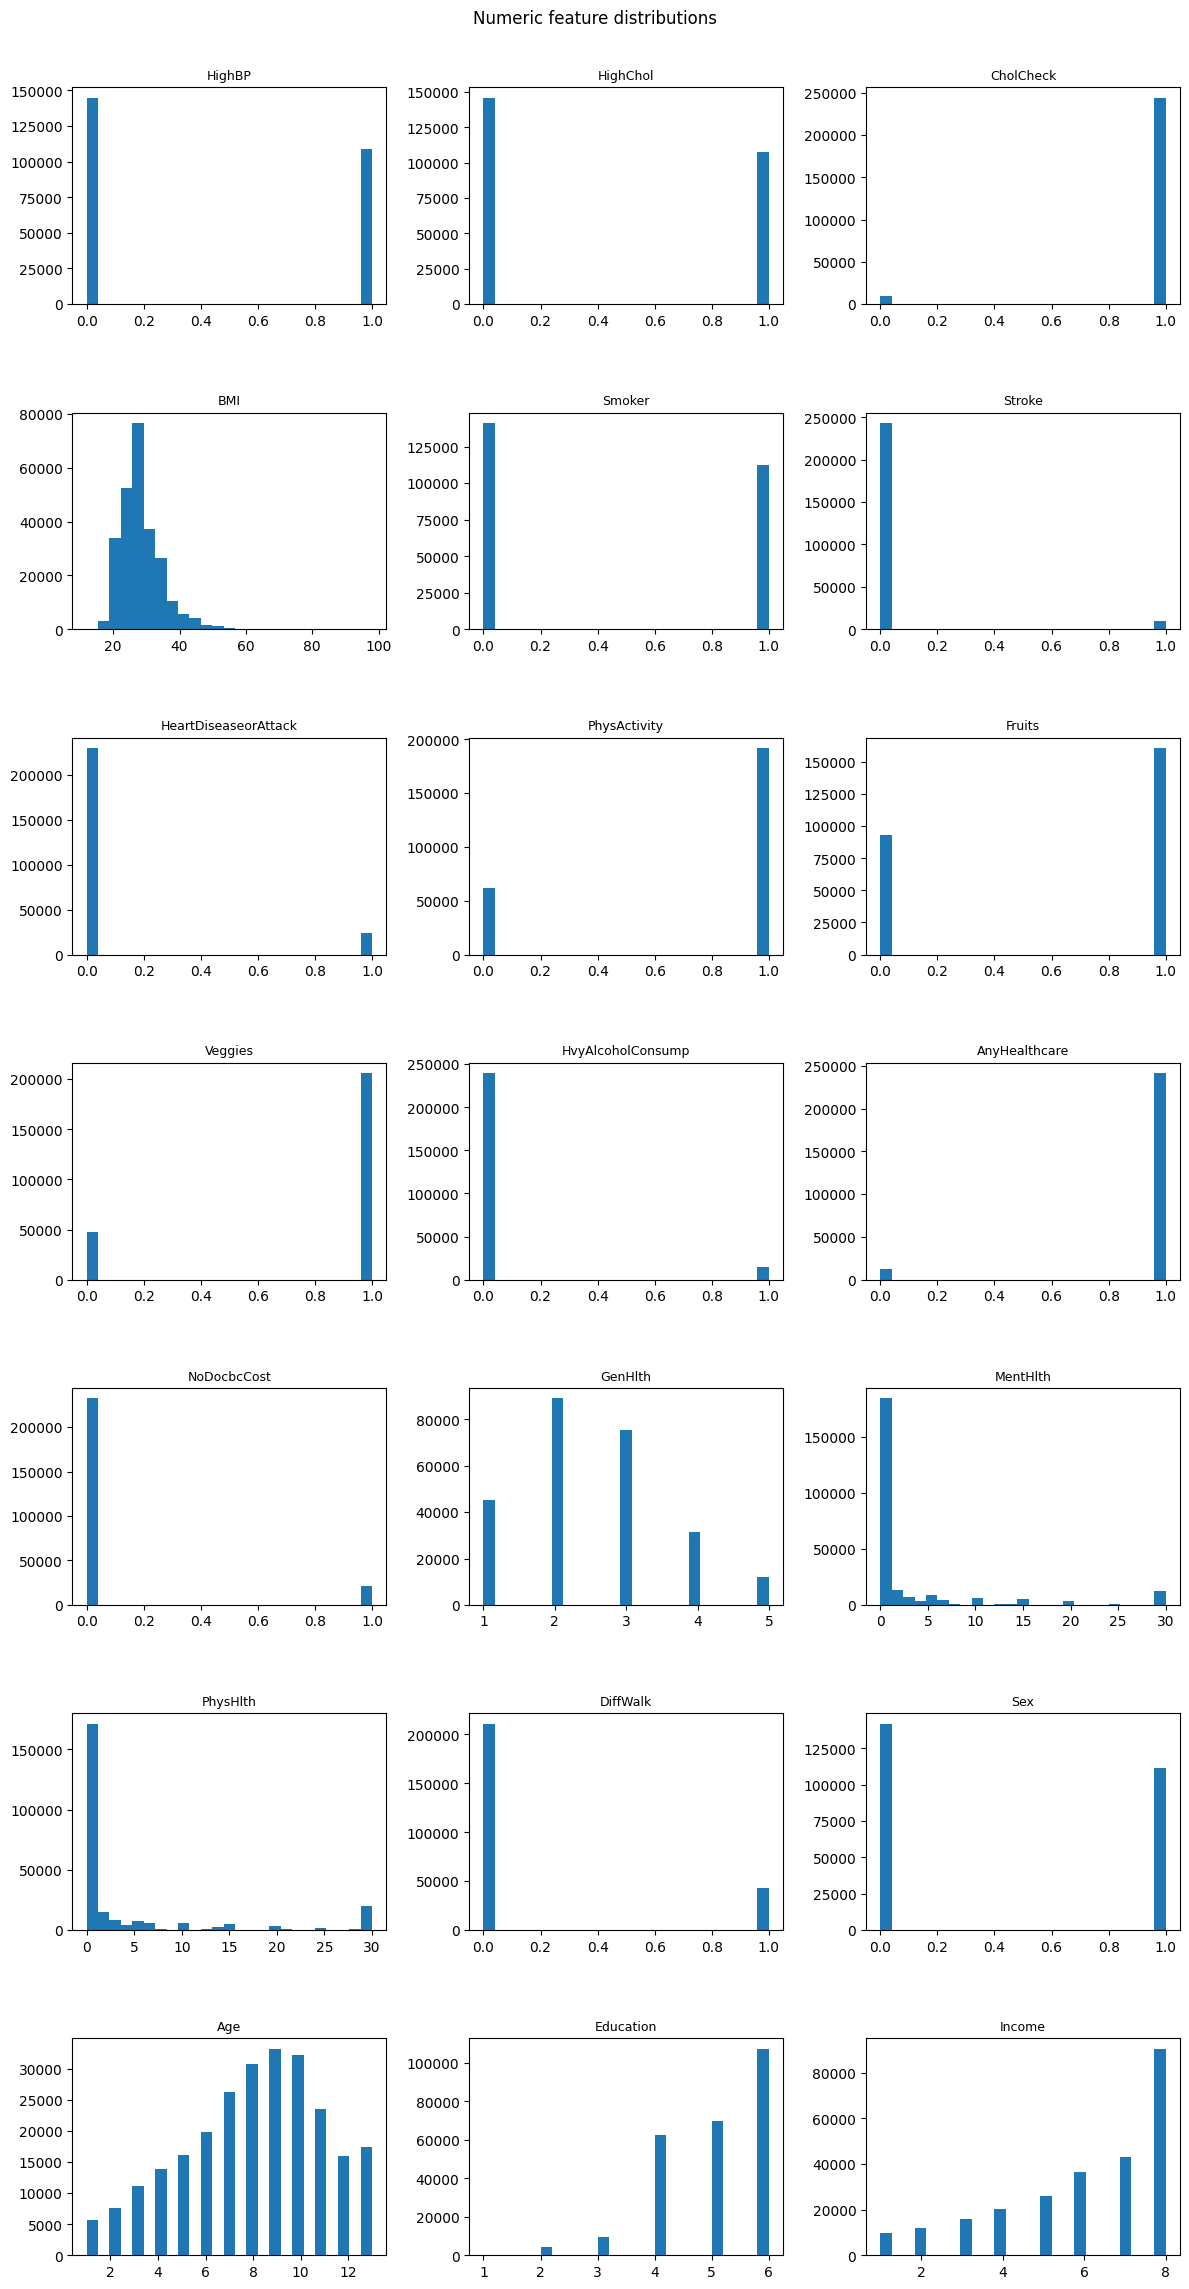

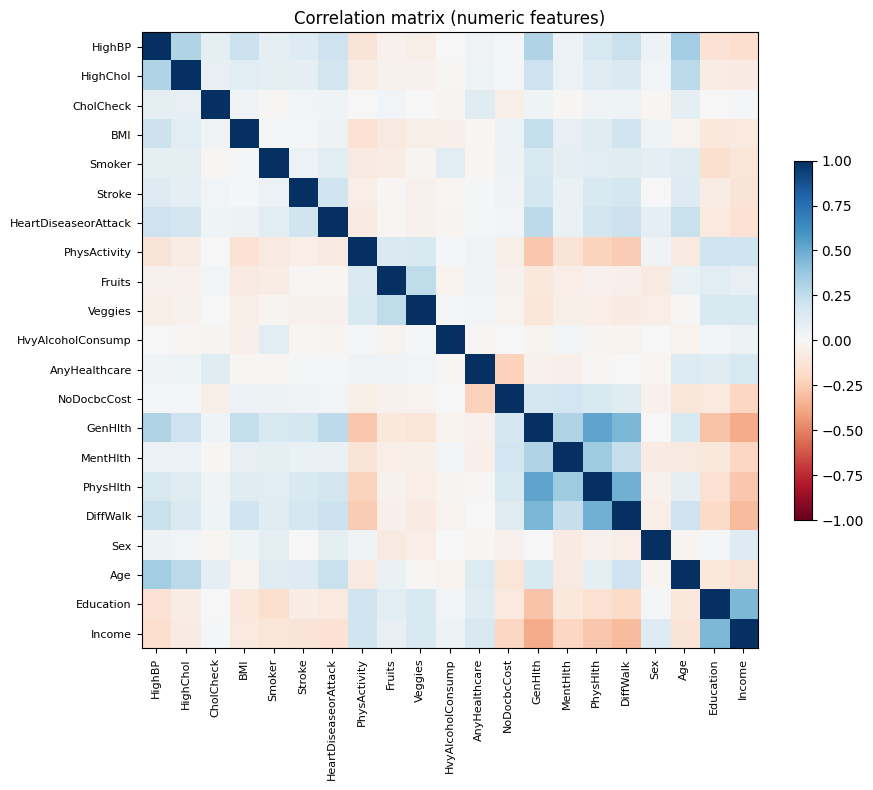

Saved all plots to folder: plots
Saved a processed preview dataset to: E:\DSc_project\diabetes_012_health_indicators_BRFSS2015_processed.csv (you can open this to verify)

Train/test sizes: (202944, 21) (50736, 21)
Train class distribution:
 Diabetes_012
0    84.2
1    15.8
Name: proportion, dtype: float64
Test class distribution:
 Diabetes_012
0    84.2
1    15.8
Name: proportion, dtype: float64

Unique labels check after split: y_train: [0 1] y_test: [0 1]

Running a quick sanity training (Logistic Regression on full features)...
Training time: 0.1527 sec | Accuracy: 0.8481 | ROC AUC: 0.817190252459295
Training time (full data): 0.1527 s
Accuracy (full data): 0.8481
ROC AUC (full data): 0.817190252459295

Classification report (full data):
               precision    recall  f1-score   support

           0     0.8652    0.9710    0.9150     42741
           1     0.5520    0.1911    0.2839      7995

    accuracy                         0.8481     50736
   macro avg     0.7086    0.

In [34]:
# ============================
# 1) Setup: imports, constants and robust preprocessing (edited)
# ============================
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve
from sklearn.calibration import calibration_curve

# ----------------------------
# User-editable config
# ----------------------------
DATA_PATH = r"E:\DSc_project\diabetes_012_health_indicators_BRFSS2015.csv"
TARGET_COLUMN = "Diabetes_012"   # column in your CSV
RANDOM_SEED = 42
TEST_SIZE = 0.20

# ----------------------------
# Basic checks & load
# ----------------------------
print("Checking file exists:", DATA_PATH)
if not os.path.isfile(DATA_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATA_PATH}. Put the CSV at this path or update DATA_PATH.")

# load dataset
df = pd.read_csv(DATA_PATH)
print("Dataset loaded. Shape:", df.shape)

# show first rows (small preview)
display(df.head(7))
print("\nColumns:", df.columns.tolist())

# ----------------------------
# Ensure target exists
# ----------------------------
if TARGET_COLUMN not in df.columns:
    raise ValueError(f"Target column '{TARGET_COLUMN}' not found. Available columns: {df.columns.tolist()}")

# ----------------------------
# Convert multiclass Diabetes_012 -> binary (0 = no, 1 = prediabetes/diabetes)
# Rationale: original dataset encodes 0 = no, 1 = prediabetes, 2 = diabetes.
# For binary classification we map 1 and 2 to 1 (diabetic/prediabetic) and 0 remains 0.
# ----------------------------
print("\nOriginal unique target values:", sorted(df[TARGET_COLUMN].unique()))
df[TARGET_COLUMN] = df[TARGET_COLUMN].apply(lambda x: 1 if x > 0 else 0)
print("After conversion, unique target values (should be [0,1]):", sorted(df[TARGET_COLUMN].unique()))

# ----------------------------
# Quick class balance check
# ----------------------------
class_counts = df[TARGET_COLUMN].value_counts()
print("\nClass distribution (counts):")
print(class_counts)
pct = class_counts / class_counts.sum() * 100
print("\nClass distribution (percentage):")
print(pct.round(2))

if pct.min() < 10.0:
    print("\nWARNING: Minor class <10% of data. Consider using class_weight='balanced' in the classifier\n"
          "or resampling (SMOTE / random oversampling) for training. Document this in your report.")

# ----------------------------
# Basic cleaning: drop columns with >50% missing values (optional)
# ----------------------------
missing_ratio = df.isna().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.5].index.tolist()
if cols_to_drop:
    print("\nDropping columns with >50% missing values:", cols_to_drop)
    df = df.drop(columns=cols_to_drop)

# ----------------------------
# Separate features and target
# ----------------------------
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN].astype(int)

# ----------------------------
# Identify numeric and categorical columns
# ----------------------------
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("\nNumeric columns (count={}):".format(len(num_cols)), num_cols)
print("Categorical columns (count={}):".format(len(cat_cols)), cat_cols)

# ----------------------------
# Impute numeric columns (median) and encode categorical columns (one-hot)
# ----------------------------
num_imputer = SimpleImputer(strategy='median')
if num_cols:
    X_num = pd.DataFrame(num_imputer.fit_transform(X[num_cols]), columns=num_cols)
else:
    X_num = pd.DataFrame(index=X.index)  # empty

if cat_cols:
    X_cat = X[cat_cols].astype(str).fillna('missing')
    X_cat_encoded = pd.get_dummies(X_cat, drop_first=True)
else:
    X_cat_encoded = pd.DataFrame(index=X.index)  # empty

X_processed = pd.concat([X_num.reset_index(drop=True), X_cat_encoded.reset_index(drop=True)], axis=1)
print("\nProcessed feature matrix shape:", X_processed.shape)


# ----------------------------
# Plots for EDA (matplotlib)
# ----------------------------

# create a folder for plots
plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# 1) Class distribution bar + percentage text
plt.figure(figsize=(6,4))
class_counts = df[TARGET_COLUMN].value_counts().sort_index()
bars = plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title("Class distribution (" + TARGET_COLUMN + ")")
plt.xlabel("Class")
plt.ylabel("Count")
# add percent labels above bars
total = class_counts.sum()
for rect, val in zip(bars, class_counts.values):
    pct_text = f"{val} ({val/total*100:.1f}%)"
    plt.text(rect.get_x() + rect.get_width()/2, val + total*0.01, pct_text, ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "class_distribution.png"), dpi=150)
plt.show()

# 2) Missing values bar (if any)
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing) > 0:
    plt.figure(figsize=(8,4))
    bars = plt.barh(missing.index.astype(str), missing.values)
    plt.title("Columns with missing values (count)")
    plt.xlabel("Missing count")
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "missing_values.png"), dpi=150)
    plt.show()
else:
    print("No missing values detected (after initial drop-of-heavy-missing columns).")

# 3) Histograms for selected numeric features (BMI, Age if present)
selected_feats = []
for candidate in ["BMI", "Age", "PhysHlth", "MentHlth", "GenHlth"]:
    if candidate in X_processed.columns or candidate in df.columns:
        selected_feats.append(candidate)

# For safety, check original df first then X_processed
available_feats = [f for f in selected_feats if f in df.columns or f in X_processed.columns]
if len(available_feats) > 0:
    for feat in available_feats:
        arr = df[feat].dropna() if feat in df.columns else X_processed[feat].dropna()
        plt.figure(figsize=(6,4))
        plt.hist(arr, bins=30)
        plt.title(f"Histogram of {feat}")
        plt.xlabel(feat)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.savefig(os.path.join(plots_dir, f"hist_{feat}.png"), dpi=150)
        plt.show()

        # boxplot
        plt.figure(figsize=(6,2))
        plt.boxplot(arr, vert=False)
        plt.title(f"Boxplot of {feat}")
        plt.xlabel(feat)
        plt.tight_layout()
        plt.savefig(os.path.join(plots_dir, f"box_{feat}.png"), dpi=150)
        plt.show()
else:
    print("Selected numeric features for histogram/boxplot not found (BMI/Age/PhysHlth etc.).")

# 4) Histograms for all numeric features in X_processed (grid)
num_cols_proc = X_num.columns.tolist() if 'X_num' in globals() else [c for c in X_processed.columns if np.issubdtype(X_processed[c].dtype, np.number)]
if len(num_cols_proc) > 0:
    per_row = 3
    n = len(num_cols_proc)
    rows = math.ceil(n / per_row)
    plt.figure(figsize=(per_row*4, rows*3.2))
    for i, col in enumerate(num_cols_proc):
        plt.subplot(rows, per_row, i+1)
        plt.hist(X_processed[col].dropna(), bins=25)
        plt.title(col, fontsize=9)
        plt.tight_layout()
    plt.suptitle("Numeric feature distributions", y=1.02, fontsize=12)
    plt.subplots_adjust(hspace=0.5)
    plt.savefig(os.path.join(plots_dir, "numeric_feature_distributions.png"), dpi=150, bbox_inches='tight')
    plt.show()
else:
    print("No numeric columns detected for distribution plots.")

# 5) Correlation heatmap (matplotlib only)
# compute correlation on numeric features
corr_cols = [c for c in X_processed.columns if np.issubdtype(X_processed[c].dtype, np.number)]
if len(corr_cols) >= 2:
    corr = X_processed[corr_cols].corr()
    # plot heatmap using imshow
    fig, ax = plt.subplots(figsize=(10,8))
    im = ax.imshow(corr, cmap='RdBu', vmin=-1, vmax=1)
    ax.set_xticks(range(len(corr_cols)))
    ax.set_yticks(range(len(corr_cols)))
    ax.set_xticklabels(corr_cols, rotation=90, fontsize=8)
    ax.set_yticklabels(corr_cols, fontsize=8)
    # colorbar
    cbar = fig.colorbar(im, ax=ax, fraction=0.02, pad=0.04)
    plt.title("Correlation matrix (numeric features)")
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "correlation_heatmap.png"), dpi=200, bbox_inches='tight')
    plt.show()
else:
    print("Not enough numeric features for correlation heatmap.")

print(f"Saved all plots to folder: {plots_dir}")



# ----------------------------
# Optional: Save processed dataset for inspection / reproducibility
# ----------------------------
processed_path = os.path.splitext(DATA_PATH)[0] + "_processed.csv"
X_processed[TARGET_COLUMN] = y.values  # temporarily attach to preserve alignment
X_processed.to_csv(processed_path, index=False)
X_processed = X_processed.drop(columns=[TARGET_COLUMN])
print(f"Saved a processed preview dataset to: {processed_path} (you can open this to verify)")

# ----------------------------
# Train-test split (stratified)
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=TEST_SIZE, random_state=RANDOM_SEED, stratify=y
)
print("\nTrain/test sizes:", X_train.shape, X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True).round(3) * 100)
print("Test class distribution:\n", y_test.value_counts(normalize=True).round(3) * 100)

# Safety check: print unique labels in train/test
print("\nUnique labels check after split:",
      "y_train:", np.unique(y_train),
      "y_test:", np.unique(y_test))

# ----------------------------
# Robust helper: function to train & evaluate Logistic Regression
# Handles binary and multiclass safely (binary is default after conversion)
# ----------------------------
def train_and_evaluate_logistic(X_tr, X_te, y_tr, y_te, use_class_weight=False, max_iter=1000, verbose=True):
    """
    Trains a Logistic Regression with a StandardScaler in a Pipeline,
    measures training time, and returns metrics and model pipeline.
    Works for binary or multiclass targets.
    """
    import time
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
    import numpy as np

    unique_labels_train = np.unique(y_tr)
    unique_labels_test = np.unique(y_te)
    n_classes = len(unique_labels_train)

    # choose classifier config
    if n_classes <= 2:
        clf_kwargs = {'solver': 'lbfgs', 'max_iter': max_iter}
    else:
        clf_kwargs = {'solver': 'lbfgs', 'max_iter': max_iter, 'multi_class': 'multinomial'}

    if use_class_weight:
        clf_kwargs['class_weight'] = 'balanced'

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(**clf_kwargs))
    ])

    # Train
    start_time = time.time()
    pipe.fit(X_tr, y_tr)
    end_time = time.time()
    train_time = end_time - start_time

    # Predict & metrics
    y_pred = pipe.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    report = classification_report(y_te, y_pred, digits=4)
    cm = confusion_matrix(y_te, y_pred)

    # Safe ROC AUC computation
    roc = None
    # if test contains only one class, AUC not defined
    if len(unique_labels_test) == 1:
        if verbose:
            print("WARNING: y_test contains only one class:", unique_labels_test,
                  "\nROC AUC cannot be computed for single-class test set.")
        roc = None
    else:
        proba = pipe.predict_proba(X_te)
        # binary case
        if proba.shape[1] == 2 and set(unique_labels_test) <= {0,1}:
            try:
                roc = roc_auc_score(y_te, proba[:,1])
            except Exception as e:
                if verbose:
                    print("Binary roc_auc_score error:", e)
                roc = None
        else:
            # multiclass case
            try:
                roc = roc_auc_score(y_te, proba, multi_class='ovr')
            except Exception as e:
                if verbose:
                    print("Multiclass roc_auc_score raised:", e)
                    print("Attempting fallback by label-binarizing y_test...")
                try:
                    classes_all = np.unique(np.concatenate([unique_labels_train, unique_labels_test]))
                    y_test_bin = label_binarize(y_te, classes=classes_all)
                    roc = roc_auc_score(y_test_bin, proba, average='macro')
                except Exception as e2:
                    if verbose:
                        print("Fallback also failed:", e2)
                    roc = None

    results = {
        'pipeline': pipe,
        'train_time_sec': train_time,
        'accuracy': acc,
        'roc_auc': roc,
        'classification_report': report,
        'confusion_matrix': cm
    }

    if verbose:
        print(f"Training time: {train_time:.4f} sec | Accuracy: {acc:.4f} | ROC AUC: {roc}")
    return results

# ----------------------------
# Example sanity-run (uncomment to run now) — this replicates Block 5 behavior
# ----------------------------
print("\nRunning a quick sanity training (Logistic Regression on full features)...")
results_full = train_and_evaluate_logistic(X_train, X_test, y_train, y_test, use_class_weight=False)
print(f"Training time (full data): {results_full['train_time_sec']:.4f} s")
print(f"Accuracy (full data): {results_full['accuracy']:.4f}")
print(f"ROC AUC (full data): {results_full['roc_auc']}\n")
print("Classification report (full data):\n", results_full['classification_report'])
print("\nConfusion Matrix:\n", results_full['confusion_matrix'])

print("\nSetup complete. You can now run Block 5 to train Logistic Regression on 'full' features")
print("Use train_and_evaluate_logistic(X_train, X_test, y_train, y_test) to train and get metrics.")


In [35]:
# 2) Load data
df = pd.read_csv(DATA_PATH)
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Numeric cols: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Categorical cols: []
Processed feature shape: (253680, 21)

Generating Block 3 preprocessing plots (only unique ones)...
No columns were dropped due to heavy missing values.


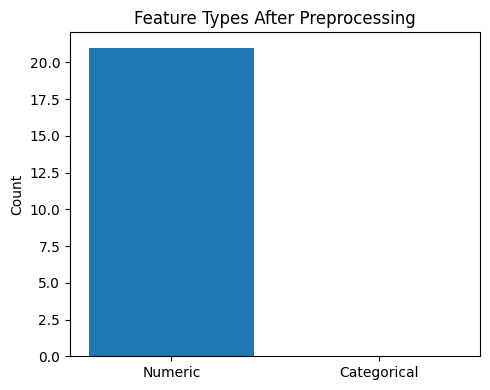

No categorical columns found.


In [36]:
# 3) Basic preprocessing
df_clean = df.copy()

# Drop columns with too many missing values (optional threshold)
threshold = 0.5 * len(df_clean)
cols_to_drop = [c for c in df_clean.columns if df_clean[c].isna().sum() > threshold]
if cols_to_drop:
    print("Dropping columns with many missing values:", cols_to_drop)
    df_clean = df_clean.drop(columns=cols_to_drop)

# Separate X and y
if TARGET_COLUMN not in df_clean.columns:
    raise ValueError(f"Target column '{TARGET_COLUMN}' not found in the dataset columns: {list(df_clean.columns)}")

X = df_clean.drop(columns=[TARGET_COLUMN])
y = df_clean[TARGET_COLUMN]

# Simple imputation and encoding
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print('Numeric cols:', num_cols)
print('Categorical cols:', cat_cols)

# Impute numeric
num_imputer = SimpleImputer(strategy='median')
X_num = pd.DataFrame(num_imputer.fit_transform(X[num_cols]), columns=num_cols)

# Encode categorical (one-hot)
if cat_cols:
    X_cat = pd.get_dummies(X[cat_cols].astype(str), drop_first=True)
    X_processed = pd.concat([X_num.reset_index(drop=True), X_cat.reset_index(drop=True)], axis=1)
else:
    X_processed = X_num

print('Processed feature shape:', X_processed.shape)


# ----------------------------
# Block 3 — Minimal Preprocessing Plots (No duplicates from Block 1)
# ----------------------------

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

print("\nGenerating Block 3 preprocessing plots (only unique ones)...")

# 1) Plot: Columns dropped due to heavy missing values
if cols_to_drop:
    plt.figure(figsize=(6,4))
    plt.barh(cols_to_drop, [df[c].isna().sum() for c in cols_to_drop])
    plt.title("Dropped Columns (Missing > 50%)")
    plt.xlabel("Missing Count")
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "block3_dropped_columns.png"), dpi=150)
    plt.show()
else:
    print("No columns were dropped due to heavy missing values.")

# 2) Plot: Count of numeric vs categorical features (unique to Block 3)
feat_types = {
    "Numeric": len(num_cols),
    "Categorical": len(cat_cols)
}

plt.figure(figsize=(5,4))
plt.bar(feat_types.keys(), feat_types.values())
plt.title("Feature Types After Preprocessing")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "block3_feature_types.png"), dpi=150)
plt.show()

# 3) Optional: Show top-value counts for categorical features (if not done earlier)
# This is unique and useful, so we keep it
if len(cat_cols) > 0:
    for cat in cat_cols:
        top_values = df_clean[cat].astype(str).value_counts().head(5)
        plt.figure(figsize=(6,3))
        plt.barh(top_values.index, top_values.values)
        plt.title(f"Top Categories for '{cat}'")
        plt.xlabel("Count")
        plt.tight_layout()
        fname = f"block3_top_values_{cat.replace('/','_')}.png"
        plt.savefig(os.path.join(plots_dir, fname), dpi=150)
        plt.show()
else:
    print("No categorical columns found.")


Train shape: (202944, 21) Test shape: (50736, 21)


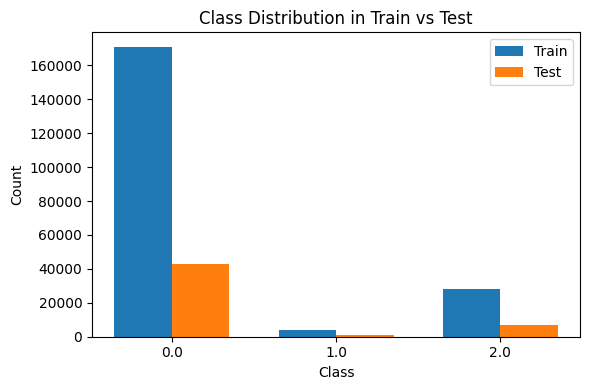

In [37]:
# 4) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y if len(np.unique(y))>1 else None
)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

labels = train_counts.index.astype(str)

x = np.arange(len(labels))
width = 0.35


plt.figure(figsize=(6,4))
plt.bar(x - width/2, train_counts.values, width, label='Train')
plt.bar(x + width/2, test_counts.values, width, label='Test')

plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Train vs Test")
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

e:\DSc_project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training time: 0.4625 sec | Accuracy: 0.8455 | ROC AUC: 0.7808466781542155
0.4625225067138672 0.8454746136865342 0.7808466781542155
              precision    recall  f1-score   support

         0.0     0.8618    0.9749    0.9149     42741
         1.0     0.0000    0.0000    0.0000       926
         2.0     0.5142    0.1739    0.2599      7069

    accuracy                         0.8455     50736
   macro avg     0.4587    0.3829    0.3916     50736
weighted avg     0.7977    0.8455    0.8069     50736



e:\DSc_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\DSc_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\DSc_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


<Figure size 500x400 with 0 Axes>

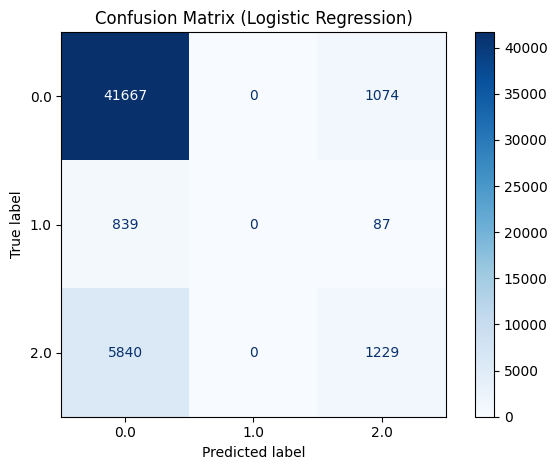

ROC Curve skipped: y_test is multiclass -> [0. 1. 2.]
roc_curve() only supports binary labels without custom handling.


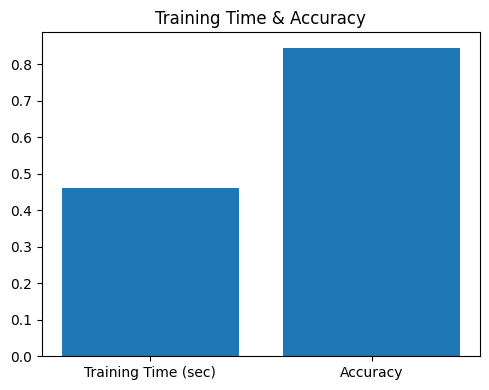

In [38]:
# model evaluation

results_full = train_and_evaluate_logistic(X_train, X_test, y_train, y_test)
print(results_full['train_time_sec'], results_full['accuracy'], results_full['roc_auc'])
print(results_full['classification_report'])

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
import numpy as np

# Extract values
clf = results_full['pipeline']
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# ----------------------------
# 1. CONFUSION MATRIX PLOT
# ----------------------------
plt.figure(figsize=(5,4))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix (Logistic Regression)")
plt.tight_layout()
plt.show()

# # ----------------------------
# # 2. ROC CURVE
# # ----------------------------
# fpr, tpr, _ = roc_curve(y_test, y_proba)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(6,4))
# plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
# plt.plot([0,1], [0,1], linestyle='--', color='gray')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve (Logistic Regression)")
# plt.legend()
# plt.tight_layout()
# plt.show()

# ----------------------------
# 2. ROC CURVE (safe for binary only)
# ----------------------------
from sklearn.metrics import roc_curve, auc
import numpy as np

y_test_unique = np.unique(y_test)

# Check if binary classification
if len(y_test_unique) == 2:
    
    # If y_proba is full matrix (n_samples, 2), use positive-class probability
    if y_proba.ndim == 2 and y_proba.shape[1] == 2:
        y_score = y_proba[:, 1]
    else:
        # assume y_proba already contains the positive-class scores
        y_score = y_proba

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Logistic Regression)")
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("ROC Curve skipped: y_test is multiclass ->", y_test_unique)
    print("roc_curve() only supports binary labels without custom handling.")


# ----------------------------
# 3. OPTIONAL: Training Time vs Accuracy Bar Plot
# ----------------------------
plt.figure(figsize=(5,4))
plt.bar(["Training Time (sec)", "Accuracy"], [results_full['train_time_sec'], results_full['accuracy']])
plt.title("Training Time & Accuracy")
plt.tight_layout()
plt.show()


Full-data training time: 0.4515 seconds
Full-data accuracy: 0.8455
Full-data ROC AUC: 0.7808

Classification report (full data):
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.51      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



e:\DSc_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\DSc_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\DSc_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


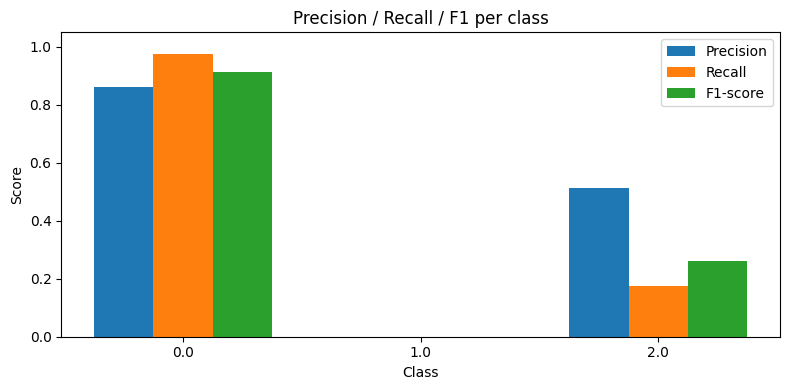

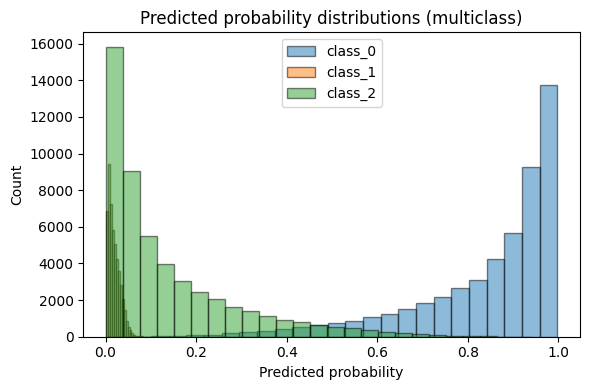

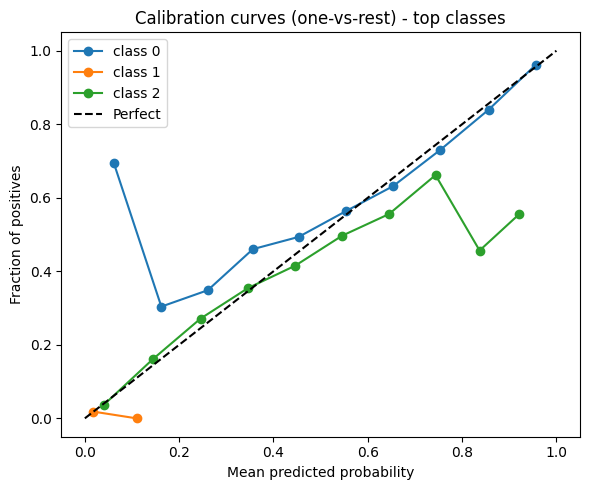

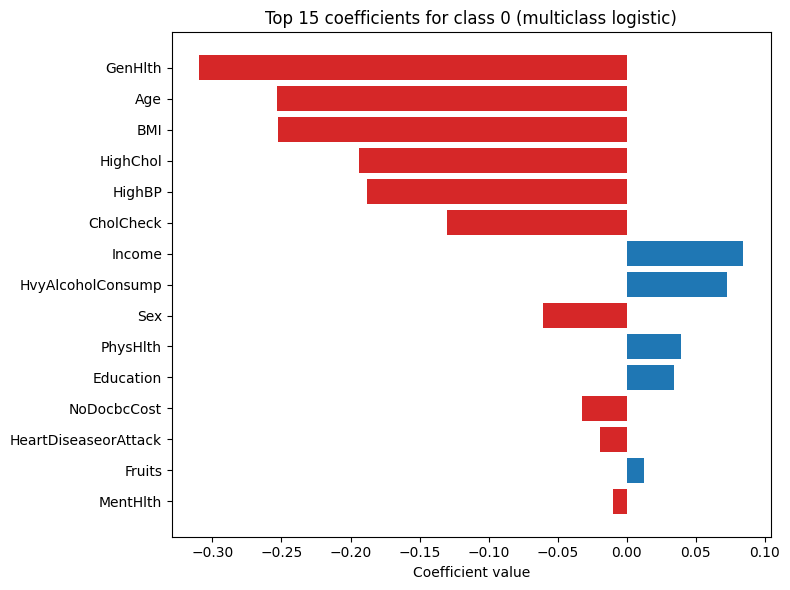

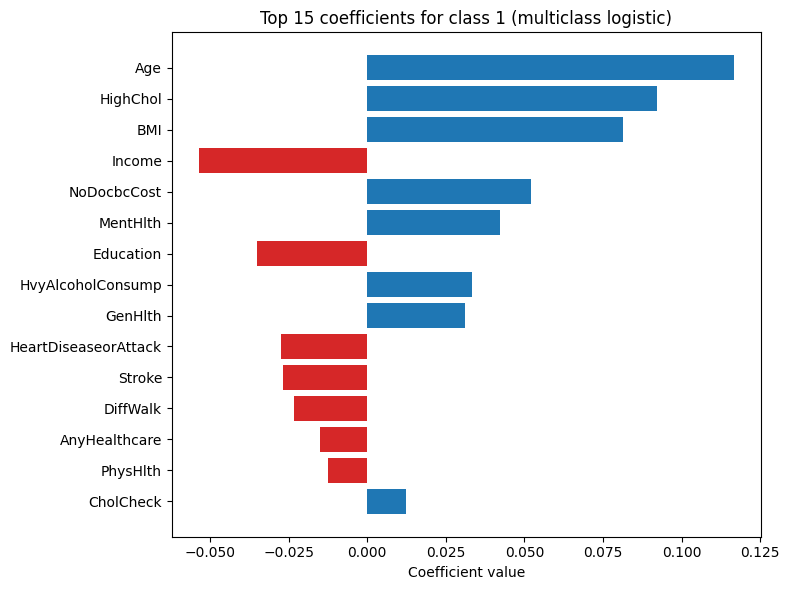

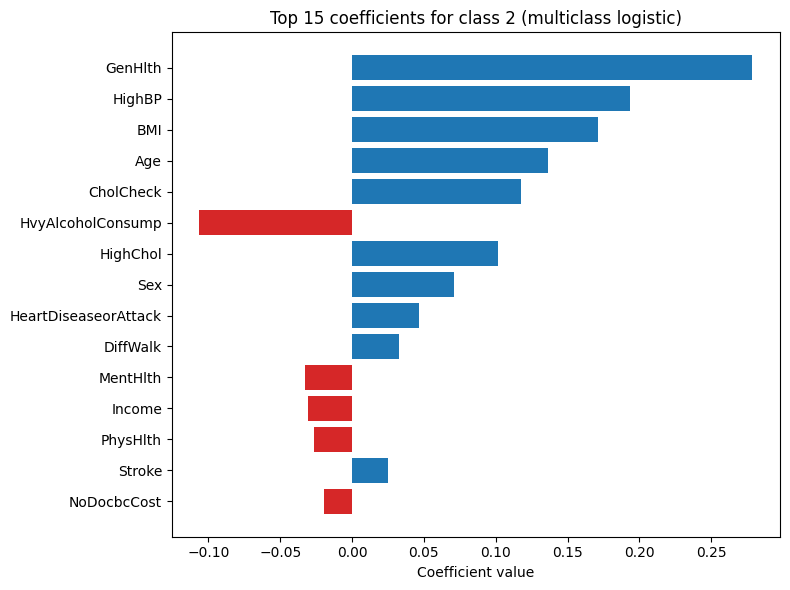

Saved Block 5 plots to: plots


In [39]:
# -------------------------
# Block 5: Train Logistic Regression on full data (robust ROC handling)
# -------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np
import time

pipe_full = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000, solver='lbfgs'))])

# Train and measure time
start = time.time()
pipe_full.fit(X_train, y_train)
end = time.time()
train_time_full = end - start

# Predictions
y_pred_full = pipe_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)

# Safe ROC computation
roc_full = None
unique_test = np.unique(y_test)
proba_full = pipe_full.predict_proba(X_test)

if len(unique_test) == 1:
    print("WARNING: y_test contains only one class:", unique_test,
          " -> ROC AUC cannot be computed (single-class test set).")
else:
    if proba_full.ndim == 1:
        # unlikely, but handle
        try:
            roc_full = roc_auc_score(y_test, proba_full)
        except Exception as e:
            print("Could not compute ROC AUC from 1D scores:", e)
            roc_full = None
    elif proba_full.shape[1] == 2 and set(unique_test) <= {0,1}:
        # binary case
        try:
            roc_full = roc_auc_score(y_test, proba_full[:,1])
        except Exception as e:
            print("Binary roc_auc_score error:", e)
            roc_full = None
    else:
        # multiclass case
        try:
            roc_full = roc_auc_score(y_test, proba_full, multi_class='ovr')
        except Exception as e:
            print("Multiclass roc_auc_score error:", e)
            # fallback: binarize y_test and use macro average
            try:
                from sklearn.preprocessing import label_binarize
                classes_all = np.unique(np.concatenate([np.unique(y_train), unique_test]))
                y_test_bin = label_binarize(y_test, classes=classes_all)
                roc_full = roc_auc_score(y_test_bin, proba_full, average='macro')
            except Exception as e2:
                print("Fallback AUC also failed:", e2)
                roc_full = None

# Print results
print(f"Full-data training time: {train_time_full:.4f} seconds")
print(f"Full-data accuracy: {acc_full:.4f}")
if roc_full is not None:
    print(f"Full-data ROC AUC: {roc_full:.4f}")
else:
    print("Full-data ROC AUC: Not available")
print('\nClassification report (full data):')
print(classification_report(y_test, y_pred_full))



# =============================
# Block 5 — plots (Precision/Recall, Prob hist, Calibration, Coeffs)
# =============================
from sklearn.metrics import precision_recall_fscore_support, precision_recall_curve
from sklearn.calibration import calibration_curve

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# ensure model pipeline exists (pipe_full) and X_test, y_test are present
model = pipe_full
if 'X_test' not in globals() or 'y_test' not in globals():
    raise RuntimeError("X_test or y_test not found in the environment. Run preprocessing/splitting first.")

# predictions & probabilities
y_pred = model.predict(X_test)
proba = model.predict_proba(X_test)  # shape (n_samples, n_classes) or (n,2) for binary
unique_test = np.unique(y_test)

# ---------------------------------------
# 1) Precision / Recall / F1 per class
# ---------------------------------------
prec, rec, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None, zero_division=0)
classes = np.unique(np.concatenate([np.unique(y_test), np.unique(y_pred)]))
# If support and classes length mismatch (rare), align by sorting
classes = np.array(sorted(classes))

plt.figure(figsize=(8,4))
x = np.arange(len(classes))
width = 0.25
plt.bar(x - width, prec[:len(classes)], width, label='Precision')
plt.bar(x, rec[:len(classes)], width, label='Recall')
plt.bar(x + width, f1[:len(classes)], width, label='F1-score')
plt.xticks(x, [str(c) for c in classes])
plt.xlabel("Class")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Precision / Recall / F1 per class")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "block5_prec_rec_f1_per_class.png"), dpi=150)
plt.show()

# ---------------------------------------
# 2) Predicted probability histogram
#    - For binary: histogram of positive-class prob
#    - For multiclass: stacked hist per-class probs (showing distribution)
# ---------------------------------------
plt.figure(figsize=(6,4))
if proba.ndim == 2 and proba.shape[1] == 2 and set(unique_test) <= {0,1}:
    # binary: plot positive-class probability
    pos_probs = proba[:, 1]
    plt.hist(pos_probs, bins=30, edgecolor='k')
    plt.title("Predicted probability (positive class) distribution")
    plt.xlabel("Predicted probability for class=1")
    plt.ylabel("Count")
    plt.tight_layout()
    fname = "block5_prob_hist_binary.png"
else:
    # multiclass: plot separate histograms (overlaid with alpha) for each class probability column
    n_classes = proba.shape[1]
    cmap = plt.get_cmap('tab10')
    for i in range(n_classes):
        plt.hist(proba[:, i], bins=25, alpha=0.5, label=f"class_{i}", color=cmap(i % 10), edgecolor='k')
    plt.title("Predicted probability distributions (multiclass)")
    plt.xlabel("Predicted probability")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    fname = "block5_prob_hist_multiclass.png"

plt.savefig(os.path.join(plots_dir, fname), dpi=150)
plt.show()

# ---------------------------------------
# 3) Calibration (reliability) curve
#    - For binary: straightforward
#    - For multiclass: show one-vs-rest calibration curve per class (up to first 3 classes to keep plots readable)
# ---------------------------------------
plt.figure(figsize=(6,5))
if proba.ndim == 2 and proba.shape[1] == 2 and set(unique_test) <= {0,1}:
    prob_pos = proba[:,1]
    frac_pos, mean_pred = calibration_curve(y_test, prob_pos, n_bins=10)
    plt.plot(mean_pred, frac_pos, 's-', label='LogReg')
    plt.plot([0,1],[0,1], 'k--', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration curve (binary)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "block5_calibration_binary.png"), dpi=150)
    plt.show()
else:
    # multiclass: one-vs-rest calibration curves (limit to first 3 classes for readability)
    n_classes = proba.shape[1]
    cmap = plt.get_cmap('tab10')
    max_show = min(n_classes, 3)
    for i in range(max_show):
        # binarize true labels for class i
        y_true_i = (np.array(y_test) == i).astype(int)
        prob_i = proba[:, i]
        frac_pos, mean_pred = calibration_curve(y_true_i, prob_i, n_bins=10)
        plt.plot(mean_pred, frac_pos, marker='o', label=f'class {i}', color=cmap(i))
    plt.plot([0,1],[0,1], 'k--', label='Perfect')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration curves (one-vs-rest) - top classes')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "block5_calibration_multiclass.png"), dpi=150)
    plt.show()

# ---------------------------------------
# 4) Top logistic-regression coefficients (feature importance)
#    - For binary: show top k positive and negative coefficients
#    - For multiclass: show top features for each class (up to 3 classes)
# ---------------------------------------
# Get feature names — expect X_train to be a DataFrame
if hasattr(X_train, "columns"):
    feat_names = list(X_train.columns)
else:
    # fallback to generic names
    feat_names = [f"f{i}" for i in range(X_train.shape[1])]

clf = model.named_steps['clf']
coefs = clf.coef_  # shape (n_classes, n_features) for multiclass; (1,n_features) for binary

# Prepare plotting
k = 15  # top-k features to show
if coefs.ndim == 1 or coefs.shape[0] == 1:
    # binary case: coefs may be shape (1, n_features)
    coef_arr = coefs.ravel() if coefs.ndim > 1 else coefs
    # get top positive and negative
    idx_pos = np.argsort(coef_arr)[-k:][::-1]
    idx_neg = np.argsort(coef_arr)[:k]
    top_idx = np.concatenate([idx_pos, idx_neg])
    top_names = [feat_names[i] for i in top_idx]
    top_vals = coef_arr[top_idx]

    plt.figure(figsize=(8,6))
    colors = ['tab:blue' if v >= 0 else 'tab:red' for v in top_vals]
    y_pos = np.arange(len(top_names))
    plt.barh(y_pos, top_vals, color=colors)
    plt.yticks(y_pos, top_names)
    plt.xlabel("Coefficient value")
    plt.title(f"Top {k} positive & negative logistic coefficients (binary)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "block5_top_coeffs_binary.png"), dpi=150)
    plt.show()
else:
    # multiclass case: show top k features per class for up to 3 classes
    n_classes = coefs.shape[0]
    classes_to_show = min(n_classes, 3)
    for cls in range(classes_to_show):
        coef_arr = coefs[cls]
        idx_top = np.argsort(np.abs(coef_arr))[-k:][::-1]
        top_names = [feat_names[i] for i in idx_top]
        top_vals = coef_arr[idx_top]
        plt.figure(figsize=(8,6))
        colors = ['tab:blue' if v >= 0 else 'tab:red' for v in top_vals]
        y_pos = np.arange(len(top_names))
        plt.barh(y_pos, top_vals, color=colors)
        plt.yticks(y_pos, top_names)
        plt.xlabel("Coefficient value")
        plt.title(f"Top {k} coefficients for class {cls} (multiclass logistic)")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig(os.path.join(plots_dir, f"block5_top_coeffs_class_{cls}.png"), dpi=150)
        plt.show()

print(f"Saved Block 5 plots to: {plots_dir}")



In [40]:
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

Unique labels in y_train: [0. 1. 2.]
Unique labels in y_test: [0. 1. 2.]


Original dimension d = 21 Using k = 10
Reduced shapes: (202944, 10) (50736, 10)
RP-data training time: 0.6739 seconds
RP-data accuracy: 0.8422
RP-data ROC AUC: 0.7353

Classification report (RP data):
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.48      0.09      0.16      7069

    accuracy                           0.84     50736
   macro avg       0.44      0.36      0.36     50736
weighted avg       0.78      0.84      0.79     50736



e:\DSc_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\DSc_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\DSc_project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


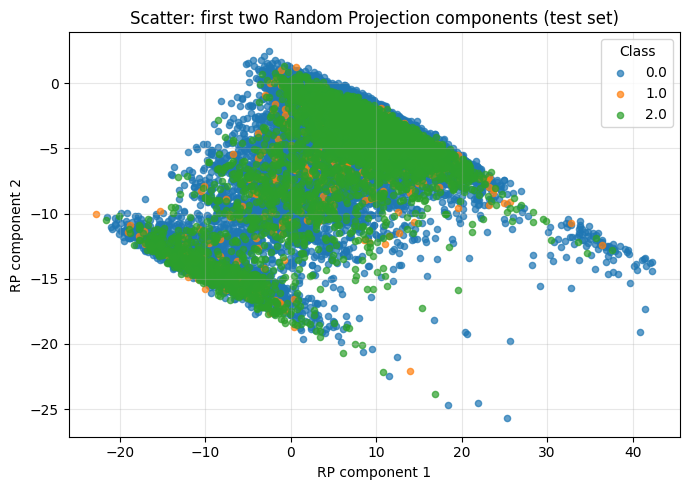

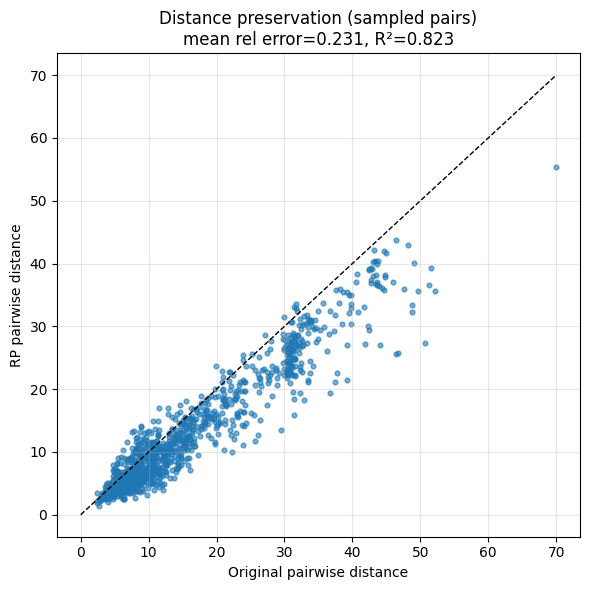

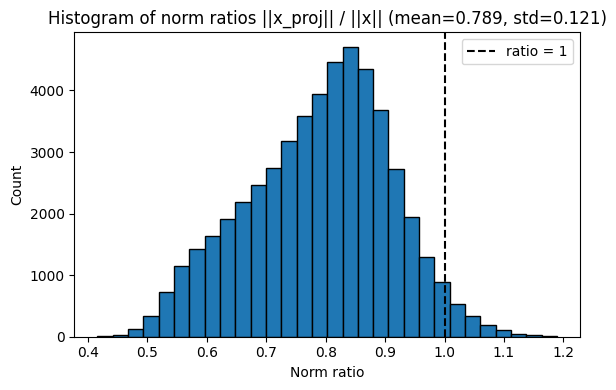

Saved Block 6 RP-specific plots to: plots


In [41]:
# -------------------------
# Block 6: Apply Random Projection and retrain (robust ROC handling)
# -------------------------
import time
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Compute d and a default k
d = X_train.shape[1]
k = min(d, max(10, int(d/2)))

print('Original dimension d =', d, 'Using k =', k)

# Random Projection transform
rp = GaussianRandomProjection(n_components=k, random_state=42)
X_train_rp = rp.fit_transform(X_train)
X_test_rp = rp.transform(X_test)

print('Reduced shapes:', X_train_rp.shape, X_test_rp.shape)

# Train logistic regression on reduced data (scale then train)
pipe_rp = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000, solver='lbfgs'))])

start = time.time()
pipe_rp.fit(X_train_rp, y_train)
end = time.time()
train_time_rp = end - start

y_pred_rp = pipe_rp.predict(X_test_rp)
acc_rp = accuracy_score(y_test, y_pred_rp)

# Safe ROC computation (handles binary / multiclass / single-class cases)
roc_rp = None
unique_test = np.unique(y_test)
proba_rp = pipe_rp.predict_proba(X_test_rp)

if len(unique_test) == 1:
    print("WARNING: y_test contains only one class:", unique_test, 
          "-> ROC AUC cannot be computed for a single-class test set.")
else:
    # binary case
    if proba_rp.ndim == 2 and proba_rp.shape[1] == 2 and set(unique_test) <= {0,1}:
        try:
            roc_rp = roc_auc_score(y_test, proba_rp[:,1])
        except Exception as e:
            print("Binary roc_auc_score error:", e)
            roc_rp = None
    else:
        # multiclass case: pass full proba matrix and use OVR
        try:
            roc_rp = roc_auc_score(y_test, proba_rp, multi_class='ovr')
        except Exception as e:
            print("Multiclass roc_auc_score error:", e)
            # fallback: binarize y_test and compute macro AUC
            try:
                from sklearn.preprocessing import label_binarize
                classes_all = np.unique(np.concatenate([np.unique(y_train), unique_test]))
                y_test_bin = label_binarize(y_test, classes=classes_all)
                roc_rp = roc_auc_score(y_test_bin, proba_rp, average='macro')
            except Exception as e2:
                print("Fallback AUC also failed:", e2)
                roc_rp = None

# Print results
print(f"RP-data training time: {train_time_rp:.4f} seconds")
print(f"RP-data accuracy: {acc_rp:.4f}")
if roc_rp is not None:
    print(f"RP-data ROC AUC: {roc_rp:.4f}")
else:
    print("RP-data ROC AUC: Not available")
print('\nClassification report (RP data):')
print(classification_report(y_test, y_pred_rp))


# ----------------------------
# Block 6 — RP-specific plots (non-duplicating)
# ----------------------------
from sklearn.metrics import r2_score

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# 1) Scatter plot of first two RP components (colored by true class)
#    - X_test_rp is available from Block 6; if k < 2, skip this plot.
if X_test_rp.shape[1] >= 2:
    plt.figure(figsize=(7,5))
    classes = np.unique(y_test)
    cmap = plt.get_cmap('tab10')
    for i, cls in enumerate(classes):
        mask = np.array(y_test) == cls
        plt.scatter(X_test_rp[mask, 0], X_test_rp[mask, 1], s=20, alpha=0.7, label=str(cls), color=cmap(i % 10))
    plt.xlabel("RP component 1")
    plt.ylabel("RP component 2")
    plt.title("Scatter: first two Random Projection components (test set)")
    plt.legend(title="Class")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    fname = os.path.join(plots_dir, "block6_rp_scatter_2comp.png")
    plt.savefig(fname, dpi=150)
    plt.show()
else:
    print("Skipping 2D RP scatter (k < 2).")

# 2) Pairwise distance preservation: sample M pairs and compare original vs RP distances
#    - sample up to M pairs for speed
M = 1000  # number of pairs to sample (adjust if you want more)
n = X_test.shape[0]
if n >= 2:
    rng = np.random.default_rng(42)
    # For speed sample indices without replacement if possible
    max_pairs = n * (n - 1) // 2
    M_eff = min(M, max_pairs)
    # sample M_eff unique pairs
    pairs = set()
    while len(pairs) < M_eff:
        i = rng.integers(0, n)
        j = rng.integers(0, n)
        if i != j:
            if i > j:
                i, j = j, i
            pairs.add((i, j))
    pairs = list(pairs)

    orig_dists = []
    rp_dists = []
    # note: use X_test (DataFrame) if needed; convert to numpy
    X_test_np = np.asarray(X_test)  # original space (after preprocessing)
    for (i, j) in pairs:
        di = np.linalg.norm(X_test_np[i] - X_test_np[j])
        dj = np.linalg.norm(X_test_rp[i] - X_test_rp[j])
        orig_dists.append(di)
        rp_dists.append(dj)

    orig_dists = np.array(orig_dists)
    rp_dists = np.array(rp_dists)
    # filter zeros (pairs with zero original distance rarely occur with continuous features)
    mask_nonzero = orig_dists > 0
    if mask_nonzero.sum() == 0:
        print("All sampled original distances are zero (unlikely) — skipping distance-preservation plot.")
    else:
        orig_d_nonzero = orig_dists[mask_nonzero]
        rp_d_nonzero = rp_dists[mask_nonzero]

        # stats
        rel_errors = np.abs(rp_d_nonzero - orig_d_nonzero) / orig_d_nonzero
        mean_rel_error = rel_errors.mean()
        r2 = r2_score(orig_d_nonzero, rp_d_nonzero)

        plt.figure(figsize=(6,6))
        plt.scatter(orig_d_nonzero, rp_d_nonzero, s=12, alpha=0.6)
        maxv = max(orig_d_nonzero.max(), rp_d_nonzero.max())
        plt.plot([0, maxv], [0, maxv], 'k--', linewidth=1)
        plt.xlabel("Original pairwise distance")
        plt.ylabel("RP pairwise distance")
        plt.title(f"Distance preservation (sampled pairs)\nmean rel error={mean_rel_error:.3f}, R²={r2:.3f}")
        plt.grid(alpha=0.3)
        plt.tight_layout()
        fname = os.path.join(plots_dir, "block6_rp_distance_preservation.png")
        plt.savefig(fname, dpi=150)
        plt.show()
else:
    print("Not enough test samples to sample pairwise distances. Skipping distance-preservation plot.")

# 3) Histogram of norm ratios ||x_proj|| / ||x|| on test set
#    - shows how RP affects vector norms (should be concentrated near 1)
X_test_np = np.asarray(X_test)
norms_orig = np.linalg.norm(X_test_np, axis=1)
norms_rp = np.linalg.norm(X_test_rp, axis=1)
# avoid division by zero
mask = norms_orig > 0
if mask.sum() == 0:
    print("All original norms are zero — skipping norm-ratio plot.")
else:
    ratios = norms_rp[mask] / norms_orig[mask]
    plt.figure(figsize=(6,4))
    plt.hist(ratios, bins=30, edgecolor='k')
    mean_ratio = ratios.mean()
    std_ratio = ratios.std()
    plt.axvline(1.0, color='k', linestyle='--', label='ratio = 1')
    plt.title(f"Histogram of norm ratios ||x_proj|| / ||x|| (mean={mean_ratio:.3f}, std={std_ratio:.3f})")
    plt.xlabel("Norm ratio")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    fname = os.path.join(plots_dir, "block6_rp_norm_ratio_hist.png")
    plt.savefig(fname, dpi=150)
    plt.show()

print(f"Saved Block 6 RP-specific plots to: {plots_dir}")






In [46]:
# -------------------------
# Block 6A: Multi-k Random Projection experiment (creates df_results)
# -------------------------
import time
import numpy as np
import pandas as pd
from sklearn.random_projection import GaussianRandomProjection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# k_values = [5, 10, 20, 30, 40, 50, 70, 100]   # you can adjust based on dataset size
k_values = [5, 10, 15, 20]   # you can adjust based on dataset size

results = []

for k in k_values:
    # RP transform
    rp = GaussianRandomProjection(n_components=k, random_state=42)
    X_train_rp = rp.fit_transform(X_train)
    X_test_rp = rp.transform(X_test)

    # Model
    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ])

    start = time.time()
    clf.fit(X_train_rp, y_train)
    end = time.time()

    train_time = end - start
    y_pred = clf.predict(X_test_rp)
    acc = accuracy_score(y_test, y_pred)
    
    # ROC handling
    proba = clf.predict_proba(X_test_rp)
    unique_labels = np.unique(y_test)

    if len(unique_labels) == 1:
        roc = None
    elif proba.shape[1] == 2 and set(unique_labels) <= {0,1}:
        roc = roc_auc_score(y_test, proba[:,1])
    else:
        # multiclass
        try:
            roc = roc_auc_score(y_test, proba, multi_class='ovr')
        except:
            y_test_bin = label_binarize(y_test, classes=unique_labels)
            roc = roc_auc_score(y_test_bin, proba, average='macro')

    results.append({
        "k": k,
        "train_time": train_time,
        "accuracy": acc,
        "roc_auc": roc
    })

df_results = pd.DataFrame(results)
df_results



,k,train_time,accuracy,roc_auc
0,5,0.328541,0.841631,0.617624
1,10,0.736385,0.842163,0.735289
2,15,1.697064,0.841986,0.755646
3,20,2.772354,0.842222,0.767445


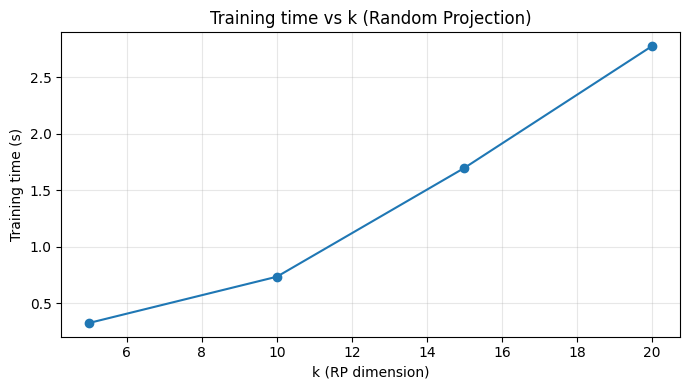

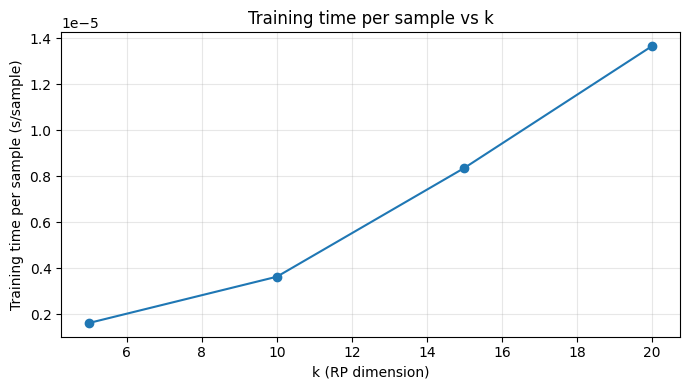

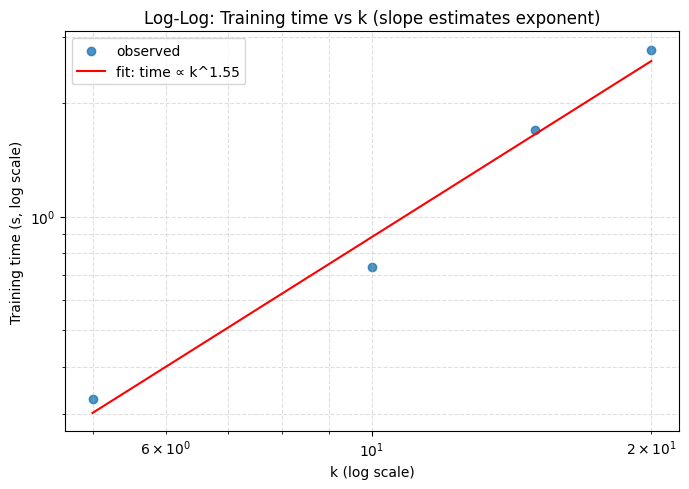

Empirical exponent wrt k: slope = 1.549 (so time ∝ k^1.549)
Saved running-time plots to plots


In [47]:
# ----------------------------
# Block 6B — Running-time analysis plots (add after df_results is computed)
# ----------------------------
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LinearRegression

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# Use df_results created in your multi-k RP experiment
# Columns expected: 'k', 'train_time', 'accuracy', 'roc_auc' (train_time in seconds)
if 'df_results' not in globals():
    raise RuntimeError("df_results not found. Run the multi-k RP experiment first and ensure df_results exists.")

# keep only rows with numeric train_time
df_time = df_results.dropna(subset=['train_time']).copy()
ks = np.array(df_time['k'].astype(float))
times = np.array(df_time['train_time'].astype(float))
n_samples = X_train.shape[0] if 'X_train' in globals() else (len(y) if 'y' in globals() else None)

# 1) Training time vs k (linear)
plt.figure(figsize=(7,4))
plt.plot(ks, times, marker='o', linestyle='-')
plt.xlabel('k (RP dimension)')
plt.ylabel('Training time (s)')
plt.title('Training time vs k (Random Projection)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "time_vs_k.png"), dpi=150)
plt.show()

# 2) Training time per sample vs k
if n_samples is not None and n_samples > 0:
    time_per_sample = times / n_samples
    plt.figure(figsize=(7,4))
    plt.plot(ks, time_per_sample, marker='o')
    plt.xlabel('k (RP dimension)')
    plt.ylabel('Training time per sample (s/sample)')
    plt.title('Training time per sample vs k')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "time_per_sample_vs_k.png"), dpi=150)
    plt.show()
else:
    print("n_samples not found; skipping time-per-sample plot.")

# 3) Log-log plot + linear fit (estimate exponent alpha for time ~ k^alpha)
#    Only do if >2 points
if len(ks) >= 3 and (times > 0).all():
    log_k = np.log(ks).reshape(-1,1)
    log_t = np.log(times)
    model = LinearRegression().fit(log_k, log_t)
    slope = model.coef_[0]
    intercept = model.intercept_
    pred_log_t = model.predict(log_k)
    pred_t = np.exp(pred_log_t)

    plt.figure(figsize=(7,5))
    plt.scatter(ks, times, label='observed', alpha=0.8)
    plt.plot(ks, pred_t, color='red', label=f'fit: time ∝ k^{slope:.2f}')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k (log scale)')
    plt.ylabel('Training time (s, log scale)')
    plt.title('Log-Log: Training time vs k (slope estimates exponent)')
    plt.legend()
    plt.grid(True, which='both', ls='--', alpha=0.4)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "loglog_time_vs_k_fit.png"), dpi=150)
    plt.show()

    print(f"Empirical exponent wrt k: slope = {slope:.3f} (so time ∝ k^{slope:.3f})")
else:
    print("Not enough points to fit a log-log slope (need >=3 k values).")

# 4) If you measured RP transform time separately (projection_time), compare projection vs training time
#    (Optional) If df_results has a 'projection_time' column, plot it
if 'projection_time' in df_time.columns:
    proj = np.array(df_time['projection_time'].astype(float))
    plt.figure(figsize=(7,4))
    plt.plot(ks, proj, marker='o', label='RP transform time')
    plt.plot(ks, times, marker='o', label='training time')
    plt.xlabel('k')
    plt.ylabel('Time (s)')
    plt.title('RP transform time vs training time')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, "projection_vs_training_time.png"), dpi=150)
    plt.show()

print(f"Saved running-time plots to {plots_dir}")


Training time full: 0.4515 seconds
Training time after RP: 0.6739 seconds
Improvement in training time: -49.24%

Accuracy (full): 0.8455
Accuracy (RP): 0.8422


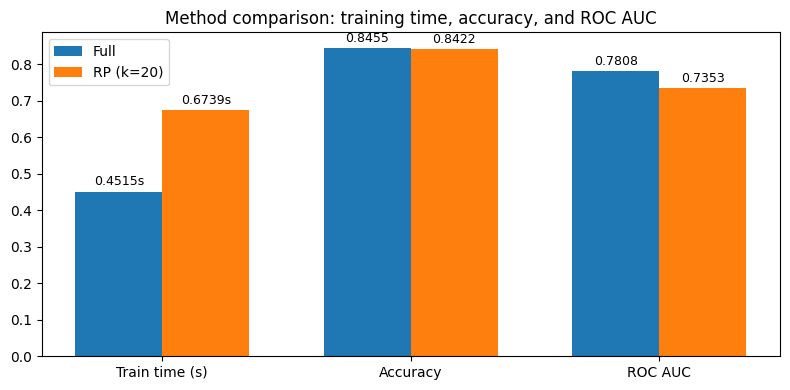

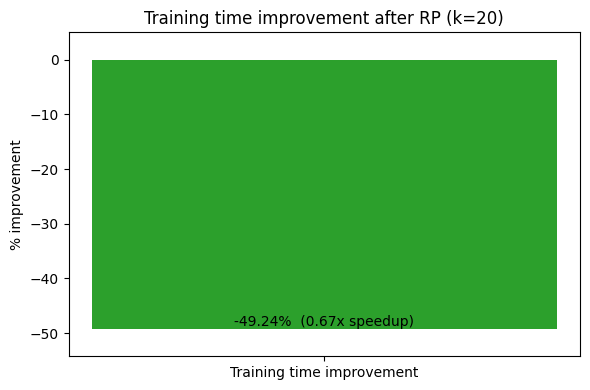

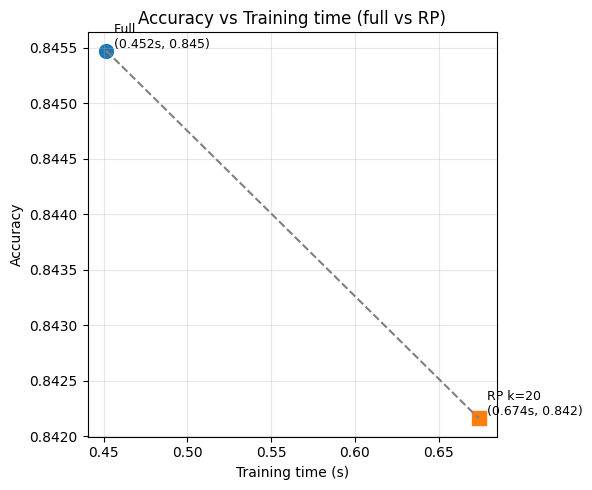

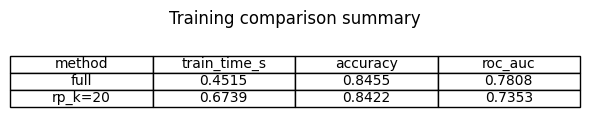

Saved Block 7 summary plots to: plots

Saved summary to training_comparison_summary.csv


In [48]:
# 7) Compare and summarize results
improvement = (train_time_full - train_time_rp) / train_time_full * 100 if train_time_full>0 else 0
print('Training time full:', round(train_time_full,4), 'seconds')
print('Training time after RP:', round(train_time_rp,4), 'seconds')
print(f'Improvement in training time: {improvement:.2f}%')

print('\nAccuracy (full):', round(acc_full,4))
print('Accuracy (RP):', round(acc_rp,4))

summary = pd.DataFrame([{
    'method': 'full',
    'train_time': train_time_full,
    'accuracy': acc_full,
    'roc_auc': roc_full
},{
    'method': 'random_projection',
    'k': k,
    'train_time': train_time_rp,
    'accuracy': acc_rp,
    'roc_auc': roc_rp
}])
summary.to_csv('training_comparison_summary.csv', index=False)

# ----------------------------
# Block 7 plots: comparison & summary (non-duplicating)
# ----------------------------


plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# Ensure variables exist (train_time_full, train_time_rp, acc_full, acc_rp, roc_full, roc_rp, k)
# If any missing, try to extract from summary DataFrame
try:
    _ = train_time_full
except NameError:
    if 'summary' in globals():
        row_full = summary[summary['method']=='full'].iloc[0]
        train_time_full = float(row_full['train_time'])
        acc_full = float(row_full['accuracy'])
        roc_full = float(row_full['roc_auc']) if not pd.isna(row_full.get('roc_auc', np.nan)) else None
    else:
        raise RuntimeError("train_time_full not found. Run previous blocks.")

try:
    _ = train_time_rp
except NameError:
    if 'summary' in globals():
        row_rp = summary[summary['method']=='random_projection'].iloc[0]
        train_time_rp = float(row_rp['train_time'])
        acc_rp = float(row_rp['accuracy'])
        roc_rp = float(row_rp['roc_auc']) if not pd.isna(row_rp.get('roc_auc', np.nan)) else None
        k = int(row_rp.get('k', k if 'k' in globals() else -1))
    else:
        raise RuntimeError("train_time_rp not found. Run previous blocks.")

# Safe replacements for missing roc
roc_full_v = roc_full if (roc_full is not None and not (isinstance(roc_full, float) and np.isnan(roc_full))) else np.nan
roc_rp_v = roc_rp if (roc_rp is not None and not (isinstance(roc_rp, float) and np.isnan(roc_rp))) else np.nan

methods = ['full', f'rp_k={k}']
# 1) Grouped bar chart: train_time, accuracy, roc_auc
labels = ['Train time (s)', 'Accuracy', 'ROC AUC']
full_vals = [train_time_full, acc_full, roc_full_v]
rp_vals   = [train_time_rp, acc_rp, roc_rp_v]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,4))
plt.bar(x - width/2, full_vals, width, label='Full')
plt.bar(x + width/2, rp_vals, width, label=f'RP (k={k})')
plt.xticks(x, labels)
plt.title("Method comparison: training time, accuracy, and ROC AUC")
plt.legend()
# annotate each bar with value (handle nan)
def annotate_bars(vals, offset):
    for i, v in enumerate(vals):
        if np.isnan(v):
            txt = "n/a"
        else:
            if i == 0:
                txt = f"{v:.4f}s"
            else:
                txt = f"{v:.4f}"
        plt.text(i + offset, (v if not np.isnan(v) else 0) + 0.01 * (max([x for x in vals if not np.isnan(x)]) if any([not np.isnan(xx) for xx in vals]) else 1), txt, ha='center', va='bottom', fontsize=9)
annotate_bars(full_vals, -width/2)
annotate_bars(rp_vals, +width/2)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "block7_grouped_comparison.png"), dpi=150)
plt.show()

# 2) Relative improvement bar & speedup factor
if train_time_full > 0:
    improvement_pct = (train_time_full - train_time_rp) / train_time_full * 100
    speedup = train_time_full / train_time_rp if train_time_rp>0 else np.nan
else:
    improvement_pct = 0
    speedup = np.nan

plt.figure(figsize=(6,4))
plt.bar(['Training time improvement'], [improvement_pct], color='tab:green')
plt.ylim(min(0, improvement_pct-5), max(5, improvement_pct+5))
plt.ylabel("% improvement")
plt.title(f"Training time improvement after RP (k={k})")
plt.text(0, improvement_pct + 0.5, f"{improvement_pct:.2f}%  ({speedup:.2f}x speedup)" if not np.isnan(speedup) else f"{improvement_pct:.2f}%", ha='center', fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "block7_time_improvement.png"), dpi=150)
plt.show()

# 3) Scatter: Accuracy vs Training Time (connect points) — visual tradeoff
plt.figure(figsize=(6,5))
plt.scatter(train_time_full, acc_full, s=100, label='Full', marker='o')
plt.scatter(train_time_rp, acc_rp, s=100, label=f'RP (k={k})', marker='s')
# connect
plt.plot([train_time_full, train_time_rp], [acc_full, acc_rp], linestyle='--', color='gray')
plt.xlabel("Training time (s)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Training time (full vs RP)")
for tx, ty, lab in [(train_time_full, acc_full, 'Full'), (train_time_rp, acc_rp, f'RP k={k}')]:
    plt.text(tx, ty, f"  {lab}\n  ({tx:.3f}s, {ty:.3f})", fontsize=9, va='bottom')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "block7_acc_vs_time.png"), dpi=150)
plt.show()

# 4) Summary table image (clean, 1-2 rows)
# Build a small dataframe for display
display_df = pd.DataFrame({
    'method': ['full', f'rp_k={k}'],
    'train_time_s': [train_time_full, train_time_rp],
    'accuracy': [acc_full, acc_rp],
    'roc_auc': [ (roc_full if roc_full is not None else np.nan), (roc_rp if roc_rp is not None else np.nan) ]
})
# round for display
display_df_rounded = display_df.copy()
display_df_rounded[['train_time_s','accuracy','roc_auc']] = display_df_rounded[['train_time_s','accuracy','roc_auc']].round(4)

# Render the table as an image using matplotlib
fig, ax = plt.subplots(figsize=(6,1.5))
ax.axis('off')
table = ax.table(cellText=display_df_rounded.values, colLabels=display_df_rounded.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.2)
plt.title("Training comparison summary")
plt.tight_layout()
fname = os.path.join(plots_dir, "block7_summary_table.png")
plt.savefig(fname, dpi=200, bbox_inches='tight')
plt.show()

print(f"Saved Block 7 summary plots to: {plots_dir}")



print('\nSaved summary to training_comparison_summary.csv')

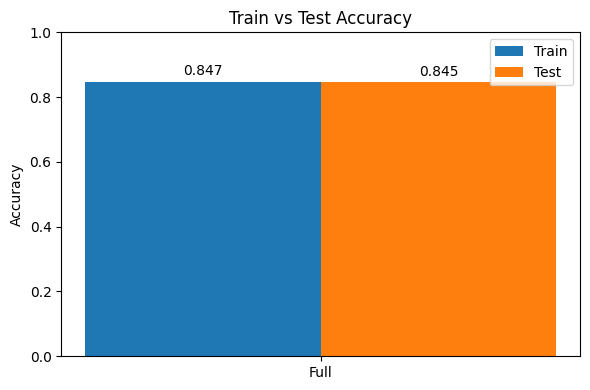

Saved: plots\train_vs_test_accuracy.png


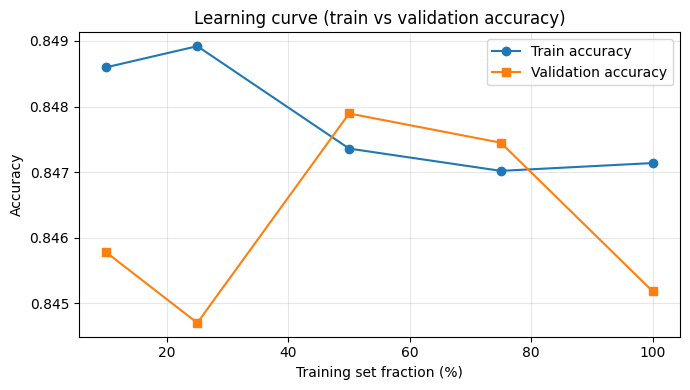

Saved: plots\learning_curve_accuracy.png


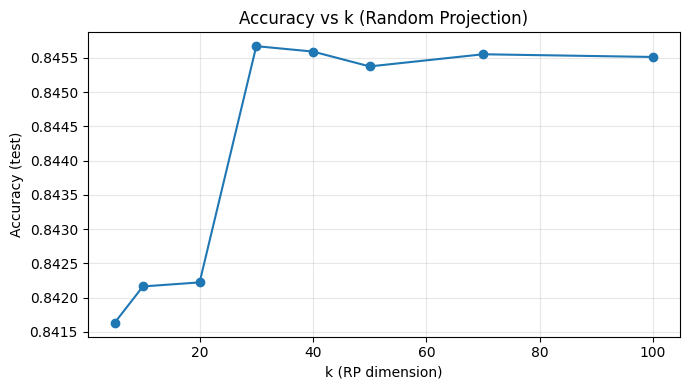

Saved: plots\accuracy_vs_k.png


In [45]:
# =========================
# Save Train/Test accuracy plots + learning curve + accuracy vs k (if available)
# =========================
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

# ---------- 1) Train vs Test accuracy (bar) ----------
# Try to fetch accuracies from available objects
acc_train_full = acc_train_full = None
acc_test_full = None
acc_train_rp = None
acc_test_rp = None

# If you used results_full or pipe_full previously, try to compute or reuse values
# Compute train accuracy for pipe_full if possible
if 'pipe_full' in globals():
    try:
        acc_train_full = accuracy_score(y_train, pipe_full.predict(X_train))
        acc_test_full = accuracy_score(y_test, pipe_full.predict(X_test))
    except Exception:
        acc_train_full = None
        acc_test_full = None

# Compute train/test for RP pipeline if available
if 'pipe_rp' in globals():
    try:
        # X_train_rp and X_test_rp should be available after Block 6; else compute using rp (if rp exists)
        if 'X_train_rp' in globals() and 'X_test_rp' in globals():
            acc_train_rp = accuracy_score(y_train, pipe_rp.predict(X_train_rp))
            acc_test_rp  = accuracy_score(y_test, pipe_rp.predict(X_test_rp))
        elif 'rp' in globals():
            X_train_rp_tmp = rp.transform(X_train) if hasattr(rp, 'transform') else None
            X_test_rp_tmp  = rp.transform(X_test)  if hasattr(rp, 'transform') else None
            if X_train_rp_tmp is not None:
                acc_train_rp = accuracy_score(y_train, pipe_rp.predict(X_train_rp_tmp))
                acc_test_rp  = accuracy_score(y_test, pipe_rp.predict(X_test_rp_tmp))
    except Exception:
        acc_train_rp = None
        acc_test_rp = None

# Build data for plot
labels = []
train_vals = []
test_vals = []
if acc_train_full is not None and acc_test_full is not None:
    labels.append('Full')
    train_vals.append(acc_train_full)
    test_vals.append(acc_test_full)
if acc_train_rp is not None and acc_test_rp is not None:
    labels.append(f'RP k={globals().get("k", "?")}')
    train_vals.append(acc_train_rp)
    test_vals.append(acc_test_rp)

if len(labels) == 0:
    print("Train/test accuracies for pipe_full or pipe_rp not available. Run evaluation or keep results in variables.")
else:
    x = np.arange(len(labels))
    width = 0.35
    plt.figure(figsize=(6,4))
    plt.bar(x - width/2, train_vals, width, label='Train')
    plt.bar(x + width/2, test_vals, width, label='Test')
    plt.xticks(x, labels)
    plt.ylim(0,1.0)
    plt.ylabel("Accuracy")
    plt.title("Train vs Test Accuracy")
    for i, (tr, te) in enumerate(zip(train_vals, test_vals)):
        plt.text(i - width/2, tr + 0.02, f"{tr:.3f}", ha='center')
        plt.text(i + width/2, te + 0.02, f"{te:.3f}", ha='center')
    plt.legend()
    plt.tight_layout()
    fname = os.path.join(plots_dir, "train_vs_test_accuracy.png")
    plt.savefig(fname, dpi=150)
    plt.show()
    print("Saved:", fname)

# ---------- 2) Learning curve (train vs validation accuracy vs training fraction) ----------
# This runs multiple fits on increasing fractions of the training data and measures train & validation acc.
def learning_curve_accuracy(estimator_factory, X, y, train_sizes=[0.1,0.25,0.5,0.75,1.0], random_state=42):
    """
    estimator_factory: function that returns a fresh unfitted estimator (pipeline)
    X, y: full training data (DataFrame/array)
    returns: lists train_size, train_acc, val_acc
    """
    train_sizes = sorted(train_sizes)
    train_accs = []
    val_accs = []
    n = len(y)
    for frac in train_sizes:
        # sample frac of training data (stratified)
        if frac < 1.0:
            X_sub, _, y_sub, _ = train_test_split(X, y, train_size=frac, stratify=y, random_state=random_state)
        else:
            X_sub, y_sub = X, y
        # further split X_sub into train_sub and val_sub (use 80/20 inside)
        X_tr_sub, X_val_sub, y_tr_sub, y_val_sub = train_test_split(X_sub, y_sub, test_size=0.2, stratify=y_sub, random_state=random_state)
        est = estimator_factory()
        est.fit(X_tr_sub, y_tr_sub)
        train_accs.append(accuracy_score(y_tr_sub, est.predict(X_tr_sub)))
        val_accs.append(accuracy_score(y_val_sub, est.predict(X_val_sub)))
    return train_sizes, train_accs, val_accs

# Use logistic pipeline factory
def lr_pipeline_factory():
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    return Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000, solver='lbfgs'))])

# Run learning curve on a sample (to save time you can reduce number of sizes)
try:
    ts, tr_accs, val_accs = learning_curve_accuracy(lr_pipeline_factory, X_train, y_train, train_sizes=[0.1,0.25,0.5,0.75,1.0], random_state=42)
    plt.figure(figsize=(7,4))
    plt.plot(np.array(ts)*100, tr_accs, marker='o', label='Train accuracy')
    plt.plot(np.array(ts)*100, val_accs, marker='s', label='Validation accuracy')
    plt.xlabel("Training set fraction (%)")
    plt.ylabel("Accuracy")
    plt.title("Learning curve (train vs validation accuracy)")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    fname = os.path.join(plots_dir, "learning_curve_accuracy.png")
    plt.savefig(fname, dpi=150)
    plt.show()
    print("Saved:", fname)
except Exception as e:
    print("Could not compute learning curve (possible cause: small dataset or stratify issues). Error:", e)

# ---------- 3) Accuracy vs k (use df_results if available) ----------
if 'df_results' in globals():
    try:
        # df_results expected to have columns 'k', 'accuracy'
        df_plot = df_results.sort_values(by='k')
        plt.figure(figsize=(7,4))
        plt.plot(df_plot['k'], df_plot['accuracy'], marker='o')
        plt.xlabel("k (RP dimension)")
        plt.ylabel("Accuracy (test)")
        plt.title("Accuracy vs k (Random Projection)")
        plt.grid(alpha=0.3)
        plt.tight_layout()
        fname = os.path.join(plots_dir, "accuracy_vs_k.png")
        plt.savefig(fname, dpi=150)
        plt.show()
        print("Saved:", fname)
    except Exception as e:
        print("df_results exists but couldn't plot accuracy vs k:", e)
else:
    print("df_results not found — accuracy vs k plot skipped. Run the multi-k experiment to generate df_results.")


## Conclusion

- This notebook trains logistic regression on the full feature set, applies Random Projection to reduce dimensions, retrains the model, and compares training time and accuracy.
- Edit `TARGET_COLUMN` and `DATA_PATH` at the top if your dataset uses different names.

## Next steps / Notes

- Try different values of `k` in Random Projection and report the performance curve.
- You can also test other randomized scaling techniques (Feature Hashing, Sampling) if required.
- For slides, report the asymptotic running time: Logistic Regression ~ O(n * d); after RP it becomes O(n * k) with k << d.